### <font face='comic sans ms' color ='sky blue'>• Write a python program to read the dataset – Use “with” python module to open and “csv.reader” to read the delimited file.</font>

In [1]:
import csv
with open('winequality-white.csv') as f:
    tab_reader=csv.reader(f,delimiter=';')
    columns=next(tab_reader)
    data={column:[] for column in columns}
    for row in tab_reader: 
        for i in range(len(columns)):
            data[columns[i]].append(float(row[i]))
columns.pop()

'quality'

### <font face='comic sans ms' color ='sky blue'>• Perform following exploratory analysis about the dataset:</font>

##### <font face='comic sans ms' color ='green'>1. Group each attributes into 30 discrete buckets and plot the histogram.(Hint: For creating the required numbers of buckets use following computation to determine the bucket size:)  bucket size = (max(attr) − min(attr))/30</font>

In [2]:
def getBucketSize(list1):
    bucket_size=(max(list1)-min(list1))/30
    return bucket_size
bucket_sizes={}
for column in columns:
    bucket_sizes[column]=getBucketSize(data[column])

In [3]:
def myHistPlot(bins_size,list1,title):
    import matplotlib.pyplot as plt
    from typing import Counter
    _histogram=Counter(x//bins_size*bins_size for x in list1)
    plt.bar(_histogram.keys(),_histogram.values())
    plt.title(f'Histogram for {title}')
    plt.show()

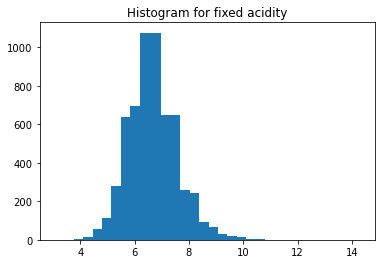

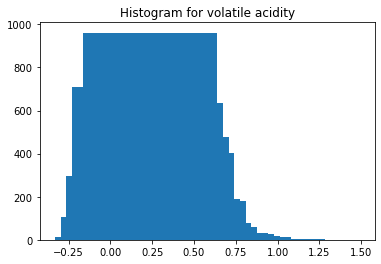

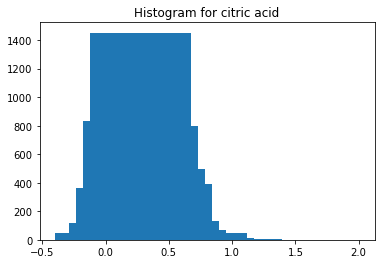

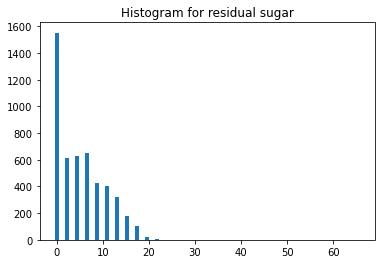

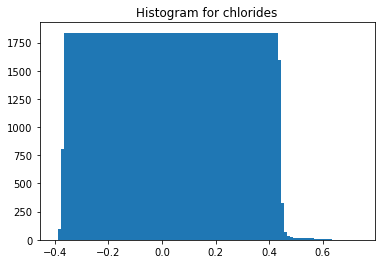

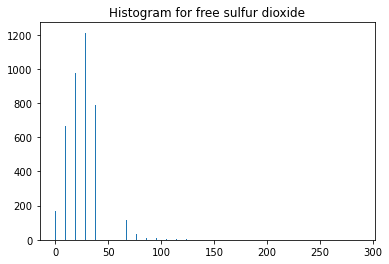

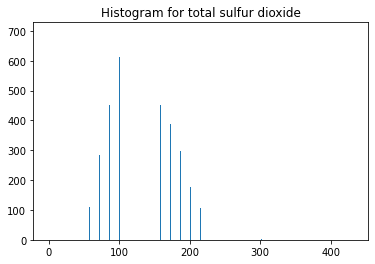

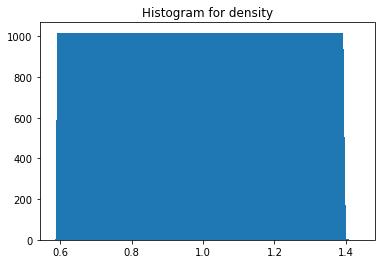

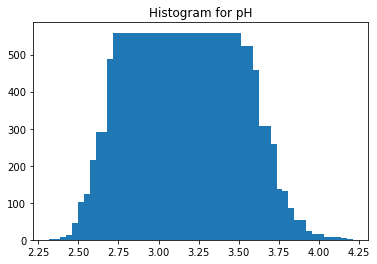

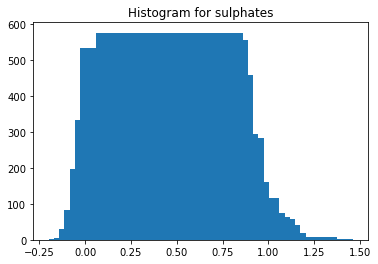

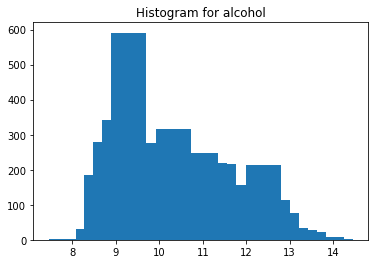

In [4]:
for column in columns:
    myHistPlot(bucket_sizes[column],data[column],column)

##### <font face='comic sans ms' color ='green'>2. Write a python program to compute and print the mean, median, mode and variance for each attribute.</font>

In [5]:
import statistics
for column in columns:
    print(f'{column}: mean={statistics.mean(data[column])}, median={statistics.median(data[column])}, mode={statistics.mode(data[column])}, variance={statistics.variance(data[column])}')

fixed acidity: mean=6.854787668436097, median=6.8, mode=6.8, variance=0.7121135857004642
volatile acidity: mean=0.2782411188240098, median=0.26, mode=0.28, variance=0.010159540992172523
citric acid: mean=0.33419150673744386, median=0.32, mode=0.3, variance=0.014645793009328216
residual sugar: mean=6.391414863209473, median=5.2, mode=1.2, variance=25.725770164385942
chlorides: mean=0.04577235606369947, median=0.043, mode=0.044, variance=0.00047733370982459155
free sulfur dioxide: mean=35.30808493262556, median=34.0, mode=29.0, variance=289.2427199993196
total sulfur dioxide: mean=138.36065741118824, median=134.0, mode=111.0, variance=1806.085490848098
density: mean=0.994027376480196, median=0.99374, mode=0.992, variance=8.945524185781195e-06
pH: mean=3.1882666394446715, median=3.18, mode=3.14, variance=0.02280118108410971
sulphates: mean=0.489846876276031, median=0.47, mode=0.5, variance=0.013024705974516443
alcohol: mean=10.514267047774602, median=10.4, mode=9.4, variance=1.51442698178

##### <font face='comic sans ms' color ='green'>3. Write a python program to compute the “covariance” for each pair of (attribute, output label).For example; between the pairs (fixed acidity, quality), (volatile acidity, quality), and so on.Name the attributes sharing same directional relationship with the output label.</font>

In [6]:
def covariance(list1,list2):
    import statistics
    x_mean=statistics.mean(list1)
    y_mean=statistics.mean(list2)
    sum1=0
    for x,y in zip(list1,list2):
        sum1+=(x-x_mean)*(y-y_mean)
    return sum1/(len(list1)-1)
for column_x in columns:
    for column_y in columns: 
        cov=covariance(data[column_x],data[column_y])
        print(f'covariance of {column_x} and {column_y} is {cov}, {"share" if cov>0 else "do not share"} same directional relationship')

covariance of fixed acidity and fixed acidity is 0.7121135857004683, share same directional relationship
covariance of fixed acidity and volatile acidity is -0.001930570601679208, do not share same directional relationship
covariance of fixed acidity and citric acid is 0.02953251157178, share same directional relationship
covariance of fixed acidity and residual sugar is 0.381021813652796, share same directional relationship
covariance of fixed acidity and chlorides is 0.00042562553610501423, share same directional relationship
covariance of fixed acidity and free sulfur dioxide is -0.7089186423667703, do not share same directional relationship
covariance of fixed acidity and total sulfur dioxide is 3.2660133926297084, share same directional relationship
covariance of fixed acidity and density is 0.0006696772557768854, share same directional relationship
covariance of fixed acidity and pH is -0.054264825953640385, do not share same directional relationship
covariance of fixed acidity a

##### <font face='comic sans ms' color ='green'>4. Construct the “correlation matrix” for the dataset as follows:</font>

(a) Case I: Based on correlation between the pair of attributes. For example; between the pairs (fixed acidity, volatile acidity), (fixed acidity, citric acid), and so on.

In [13]:
def correlation(array1:list,array2:list)->float:
    import statistics
    cor=covariance(array1,array2)/(statistics.stdev(array1)*statistics.stdev(array2))
    return cor

correlation_matrix=[]
for column_x in columns:
    _row=[]
    for column_y in columns:
        if column_x==column_y: break
        _row.append(correlation(data[column_x],data[column_y]))
    correlation_matrix.append(_row)

(b) Case II: Based on correlation between the pair (attribute, output label). For example; between the pairs (fixed acidity, quality), (volatile acidity, quality), and so on.

In [15]:
correlation_matrix2=[]
for column in columns:
    correlation_matrix2.append(correlation(data[column],data['quality']))

##### <font face='comic sans ms' color ='green'>5. Answer following based on “correlation matrix” obtained from previous steps:</font>

(a) From Case I, name the two attributes sharing maximum similarity and dis-similarity.

In [20]:
x,y=0,0
x1,y1=0,0
_min=0
_max=0
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix[i])):
        if _max<correlation_matrix[i][j]:
            _max=correlation_matrix[i][j]
            x,y=i,j
        if _min>correlation_matrix[i][j]:
            _min=correlation_matrix[i][j]
            x1,y1=i,j
print(f'the attributes sharing maximum similarity are {columns[x]} and {columns[y]}.')
print(f'the attributes sharing maximum dis-similarity are {columns[x1]} and {columns[y1]}.')

the attributes sharing maximum similarity are density and residual sugar.
the attributes sharing maximum dis-similarity are alcohol and density.


(b) From Case II, name the attribute sharing maximum similarity and dis-similarity with the
output label.

In [21]:
x=0
x1=0
_min=correlation_matrix2[x1]
_max=correlation_matrix2[x]
for i in range(len(correlation_matrix)):
    if _max<correlation_matrix2[i]:
        _max=correlation_matrix2[i]
        x=i
    if _min>correlation_matrix2[i]:
        _min=correlation_matrix2[i]
        x1=i
print(f'the attribute sharing maximum similarity with the output label is {columns[x]}.')
print(f'the attribute sharing maximum dis-similarity with the output label is {columns[x1]}.')

the attribute sharing maximum similarity with the output label is alcohol.
the attribute sharing maximum dis-similarity with the output label is density.


##### <font face='comic sans ms' color ='green'>6. Construct the “scatter-plot matrix” to show between the attribute’s relationships.</font>

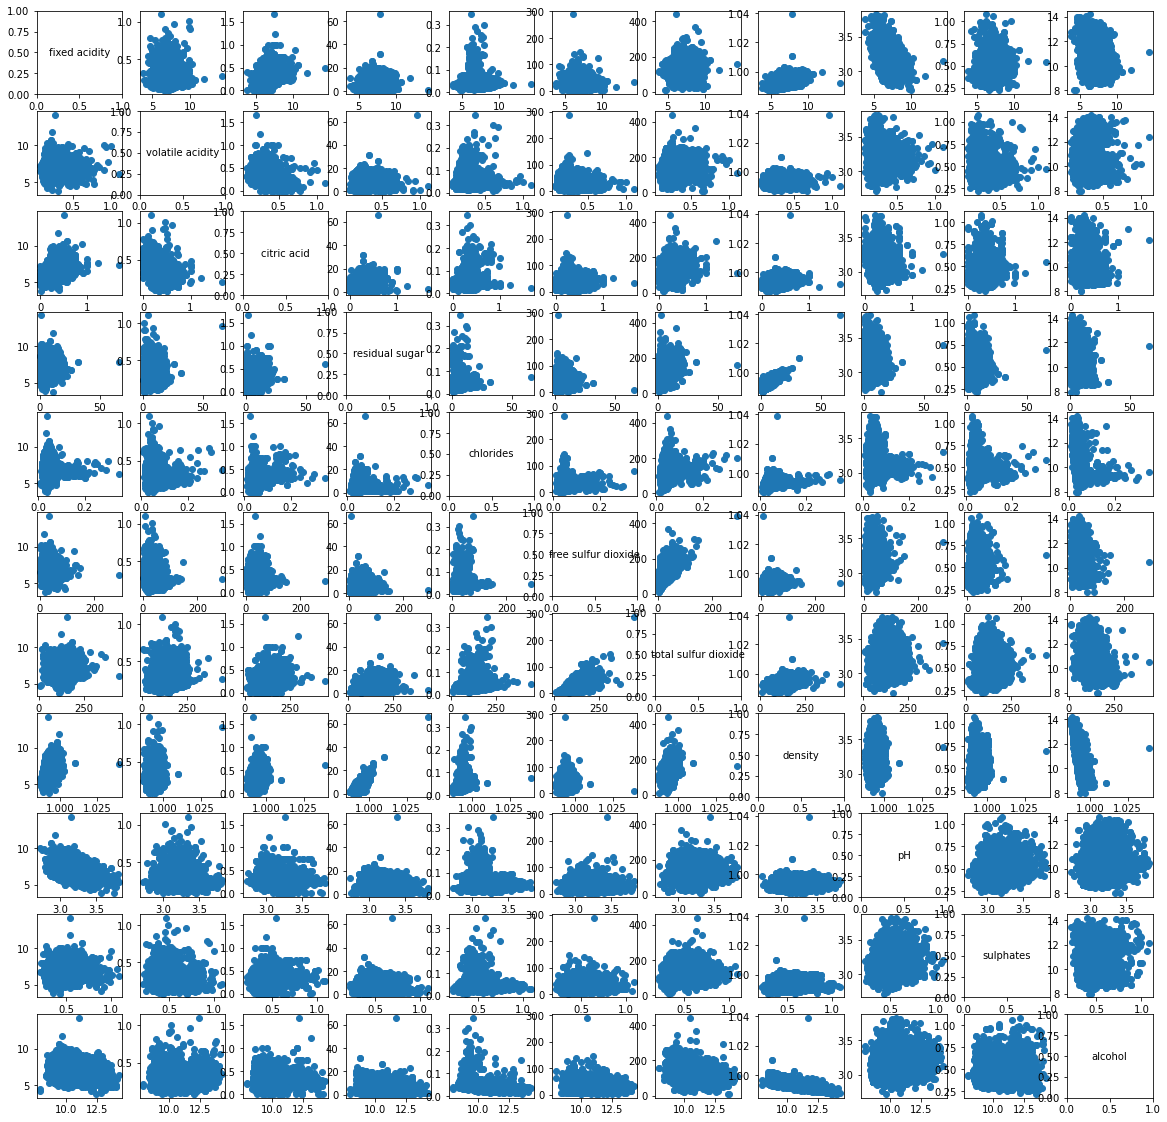

In [7]:
_size=len(columns)
fig,ax=plt.subplots(_size,_size,figsize=(20,20))
for i in range(_size):
    for j in range(_size):
        if i!=j: ax[i][j].scatter(data[columns[i]],data[columns[j]])
        else: ax[i][j].annotate(columns[i],(0.5,0.5),xycoords='axes fraction',ha='center',va='center')
plt.show()